In [ ]:


# Install YOLOv5 and dependencies
!git clone https://github.com/ultralytics/yolov5  # clone YOLOv5 repository
!pip install -r yolov5/requirements.txt  # install dependencies

# Change directory to yolov5
%cd yolov5

# Import necessary libraries
import torch
import torchvision
from IPython.display import Image, clear_output  # to display images

# Verify installation
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
clear_output()
print("YOLOv5 and dependencies installed successfully.")

# Prepare Dataset
# Assume your dataset is in /content/drive/MyDrive/trymodel with subdirectories 'images' and 'labels'

# Define paths
dataset_path = '/content/drive/MyDrive/trymodel'
train_images = os.path.join(dataset_path, 'images', 'train')
train_labels = os.path.join(dataset_path, 'labels', 'train')
val_images = os.path.join(dataset_path, 'images', 'val')
val_labels = os.path.join(dataset_path, 'labels', 'val')

# Check if dataset is properly structured
if not (os.path.exists(train_images) and os.path.exists(train_labels) and os.path.exists(val_images) and os.path.exists(val_labels)):
    print("Please ensure your dataset is structured with 'images/train', 'images/val', 'labels/train', 'labels/val' directories.")
else:
    print("Dataset structure verified.")

# Create a data.yaml file
data_yaml = """
train: {train_images}
val: {val_images}

nc: 2  # number of classes (change this according to your dataset)
names: ['class1', 'class2']  # class names (change this according to your dataset)
""".format(train_images=train_images, val_images=val_images)

# Save data.yaml
with open('data.yaml', 'w') as f:
    f.write(data_yaml)

print("data.yaml created.")

# Train YOLOv5 model
!python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt

# Save the trained model
trained_model_path = '/content/drive/MyDrive/trymodel/saved_model.pt'
!cp runs/train/exp/weights/best.pt {trained_model_path}

print(f"Model saved to {trained_model_path}")

YOLOv5 and dependencies installed successfully.
Please ensure your dataset is structured with 'images/train', 'images/val', 'labels/train', 'labels/val' directories.
data.yaml created.
2024-05-23 14:55:56.078843: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 14:55:56.078915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 14:55:56.210914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noaut

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



PENGUIN BOOKS 


MY FAMILY AND OTHER ANIMALS 


Gerald Durrell was born in Jamshedpur, India, in 
1925. In 1928 his family returned to England and in 
1933 they went to live on the Continent. Eventually 
they settled on the island of Corfu, where they lived 
until 1 9 3 9. During this time he made a special study of 
zoology, and kept a large number of the local wild 
animals as pets. In 1945 he joined the staff at Whips- 
nade Park as a student keeper. In 1 947 he financed, or- 
ganized and 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'island': 47, 'corfu': 31}


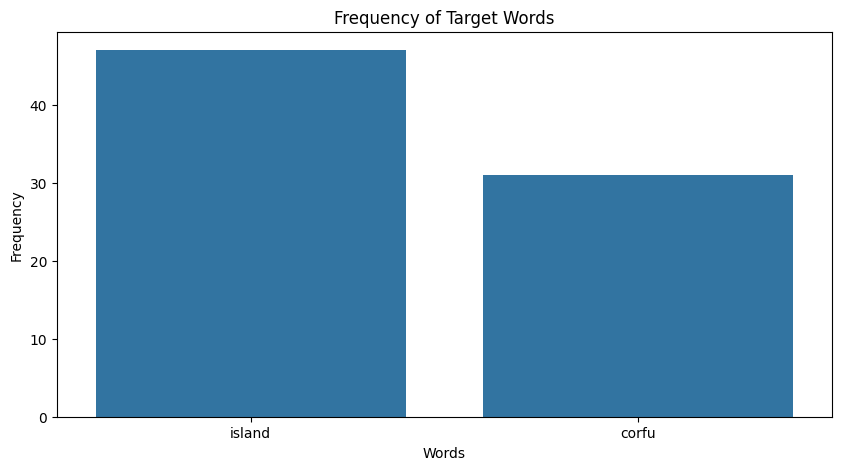

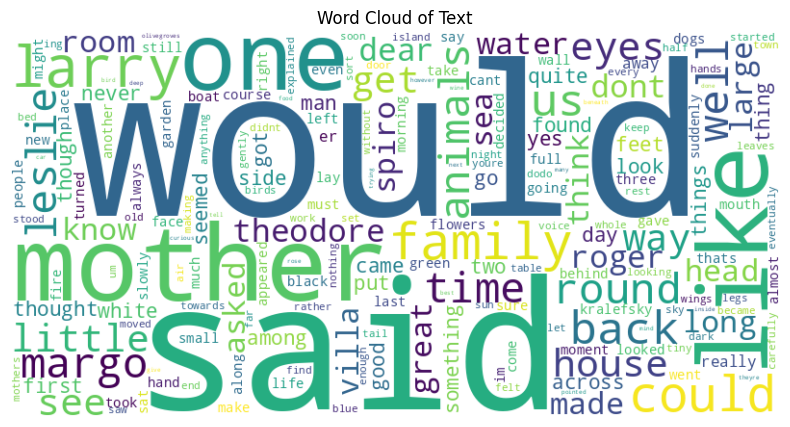

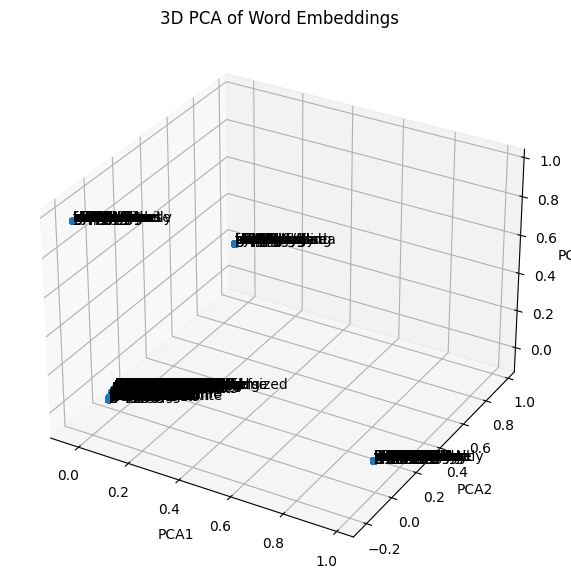

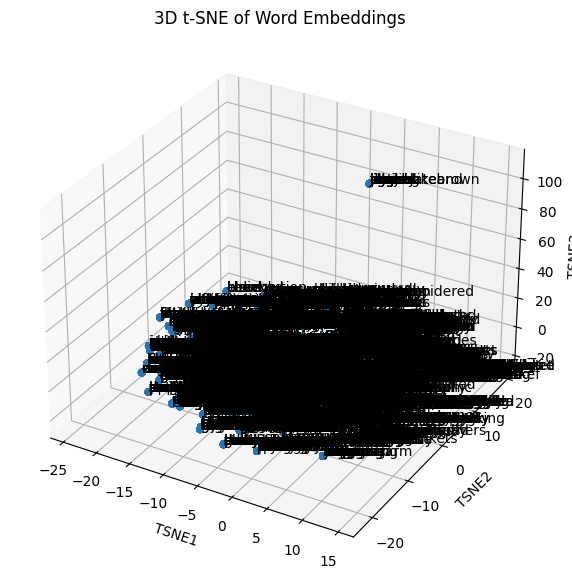

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Mount Google Drive
drive.mount('/content/drive')

# Load the text file
file_path = '/content/drive/MyDrive/family.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Print the first 500 characters to check
print(text[:500])
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

tokens = preprocess_text(text)
target_words = ['island', 'corfu']

# Count occurrences of target words
word_count = Counter(tokens)
target_counts = {word: word_count[word] for word in target_words}

print(target_counts)

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=list(target_counts.keys()), y=list(target_counts.values()))
plt.title('Frequency of Target Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text')
plt.show()

# Create document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokens)
terms = vectorizer.get_feature_names_out()

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.toarray())

# Plot 3D PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
for i, term in enumerate(terms):
    ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], term)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('3D PCA of Word Embeddings')
plt.show()

# Perform t-SNE
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X.toarray())

# Plot 3D t-SNE
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2])
for i, term in enumerate(terms):
    ax.text(tsne_result[i, 0], tsne_result[i, 1], tsne_result[i, 2], term)

ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.title('3D t-SNE of Word Embeddings')
plt.show()



In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Install YOLOv8 and dependencies
!pip install ultralytics opencv-python-headless

# Step 3: Set up directories and paths
import os
import shutil
import random

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/project-7-at-2024-05-28-10-58-9c947ad2'
train_path = f'{drive_path}/images/train'
val_path = f'{drive_path}/images/val'
labels_train_path = f'{drive_path}/labels/train'
labels_val_path = f'{drive_path}/labels/val'

# Create directories for train and val
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(labels_train_path, exist_ok=True)
os.makedirs(labels_val_path, exist_ok=True)

# Function to split the dataset
def train_test_split(images_dir, labels_dir, split_ratio=0.8):
    images = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]
    random.shuffle(images)

    split_idx = int(len(images) * split_ratio)
    train_images = images[:split_idx]
    val_images = images[split_idx:]

    for img in train_images:
        try:
            shutil.move(os.path.join(images_dir, img), os.path.join(train_path, img))
            label = img.replace('.png', '.txt').replace('.jpg', '.txt')  # Assuming labels have the same name as images but with .txt extension
            shutil.move(os.path.join(labels_dir, label), os.path.join(labels_train_path, label))
        except FileNotFoundError:
            print(f"Label for {img} not found, skipping.")

    for img in val_images:
        try:
            shutil.move(os.path.join(images_dir, img), os.path.join(val_path, img))
            label = img.replace('.png', '.txt').replace('.jpg', '.txt')
            shutil.move(os.path.join(labels_dir, label), os.path.join(labels_val_path, label))
        except FileNotFoundError:
            print(f"Label for {img} not found, skipping.")

# Split the dataset
train_test_split(f'{drive_path}/images', f'{drive_path}/labels')

# Ensure the 'data' directory exists
os.makedirs('data', exist_ok=True)

# Create a YAML configuration file for your dataset
data_config = f"""
train: {train_path}
val: {val_path}

nc: 4  # Update with the correct number of classes
names: ['beaches', 'island', 'names', 'descriptions', 'signs']
"""

# Save the configuration to a file
with open('data/custom_dataset.yaml', 'w') as f:
    f.write(data_config)

# Step 4: Train the YOLOv8 Model
!yolo task=detect mode=train data=data/custom_dataset.yaml model=yolov8s.pt epochs=50 imgsz=640 batch=16

# Step 5: Evaluate the Model
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data/custom_dataset.yaml

# Step 6: Use the Trained Model for Inference
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/tryyolo8 imgsz=640 conf=0.25

Mounted at /content/drive
Ultralytics YOLOv8.2.23 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data/custom_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install YOLOv8 and dependencies
!pip install ultralytics opencv-python-headless

# Step 3: Set up directories and paths
import os
import shutil
import random

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/YOLOV8'

# Create directories for train and val
os.makedirs(f'{drive_path}/images/train', exist_ok=True)
os.makedirs(f'{drive_path}/images/val', exist_ok=True)
os.makedirs(f'{drive_path}/labels/train', exist_ok=True)
os.makedirs(f'{drive_path}/labels/val', exist_ok=True)

# Function to split the dataset
def train_test_split(images_dir, labels_dir, split_ratio=0.8):
    images = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]
    random.shuffle(images)

    split_idx = int(len(images) * split_ratio)
    train_images = images[:split_idx]
    val_images = images[split_idx:]

    for img in train_images:
        try:
            shutil.move(os.path.join(images_dir, img), os.path.join(f'{images_dir}/train', img))
            label = img.replace('.png', '.txt').replace('.jpg', '.txt')  # Assuming labels have the same name as images but with .txt extension
            shutil.move(os.path.join(labels_dir, label), os.path.join(f'{labels_dir}/train', label))
        except FileNotFoundError:
            print(f"Label for {img} not found, skipping.")

    for img in val_images:
        try:
            shutil.move(os.path.join(images_dir, img), os.path.join(f'{images_dir}/val', img))
            label = img.replace('.png', '.txt').replace('.jpg', '.txt')
            shutil.move(os.path.join(labels_dir, label), os.path.join(f'{labels_dir}/val', label))
        except FileNotFoundError:
            print(f"Label for {img} not found, skipping.")

# Split the dataset
train_test_split(f'{drive_path}/images', f'{drive_path}/labels')

# Ensure the 'data' directory exists
os.makedirs('data', exist_ok=True)

# Create a YAML configuration file for your dataset
data_config = f"""
train: {drive_path}/images/train
val: {drive_path}/images/val

nc: 4  # Update with the correct number of classes
names: ['beaches', 'island', 'names_and_descriptions', signs']  # Update with your class names
"""

# Save the configuration to a file
with open('data/custom_dataset.yaml', 'w') as f:
    f.write(data_config)

# Step 4: Train the YOLOv8 Model
!yolo task=detect mode=train data=data/custom_dataset.yaml model=yolov8s.pt epochs=50 imgsz=640 batch=16

# Step 5: Evaluate the Model
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data/custom_dataset.yaml

# Step 6: Use the Trained Model for Inference
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/tryyolo8 imgsz=640 conf=0.25


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics YOLOv8.2.23 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data/custom_dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

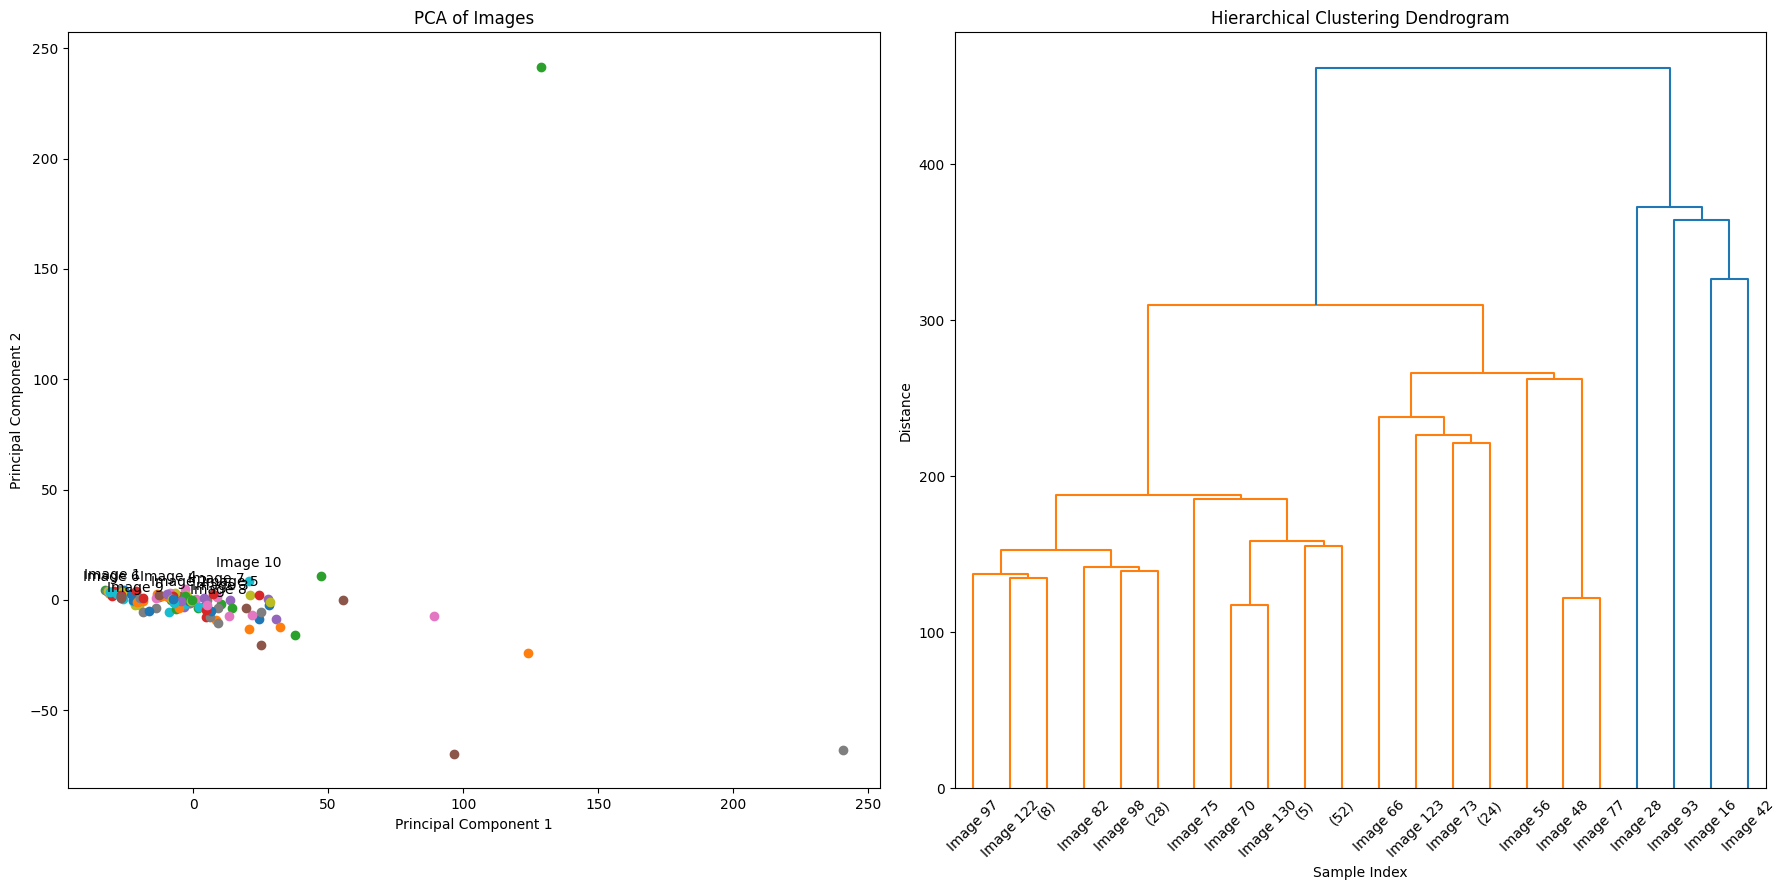

In [ ]:
# Import necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import os

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img = Image.open(os.path.join(folder, filename)).convert('L')
            if img is not None:
                images.append(img)
    return images

# Function to preprocess images (resize and flatten)
def preprocess_images(images, size=(100, 100)):
    resized_images = [img.resize(size) for img in images]
    flattened_images = [np.array(img).flatten() for img in resized_images]
    return np.array(flattened_images)

# Function to perform PCA
def perform_pca(image_data):
    scaler = StandardScaler()
    image_data_std = scaler.fit_transform(image_data)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(image_data_std)
    return principal_components

# Function to perform hierarchical clustering
def perform_clustering(image_data_std):
    return linkage(image_data_std, method='ward')

# Function to visualize PCA results and dendrogram
def visualize_results(principal_components, linked, image_labels):
    plt.figure(figsize=(18, 9))

    # PCA scatter plot with image labels
    plt.subplot(1, 2, 1)
    for i, txt in enumerate(image_labels):
        plt.scatter(principal_components[i, 0], principal_components[i, 1])
        if i < 10:  # Annotate only the first 10 images for clarity
            plt.annotate(txt, (principal_components[i, 0], principal_components[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('PCA of Images')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Dendrogram with labels
    plt.subplot(1, 2, 2)
    dendrogram(linked, labels=image_labels, truncate_mode='level', p=5)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

    plt.tight_layout()
    plt.show()

# Specify the folder containing images
image_folder = '/content/drive/MyDrive/hdm'  # Update this path as per your folder structure

# Load and preprocess images
images = load_images_from_folder(image_folder)
image_data = preprocess_images(images)

# Perform PCA
principal_components = perform_pca(image_data)

# Standardize the feature vectors for clustering
scaler = StandardScaler()
image_data_std = scaler.fit_transform(image_data)

# Perform hierarchical clustering
linked = perform_clustering(image_data_std)

# Create image labels
image_labels = [f'Image {i+1}' for i in range(len(images))]

# Visualize PCA results and dendrogram
visualize_results(principal_components, linked, image_labels)

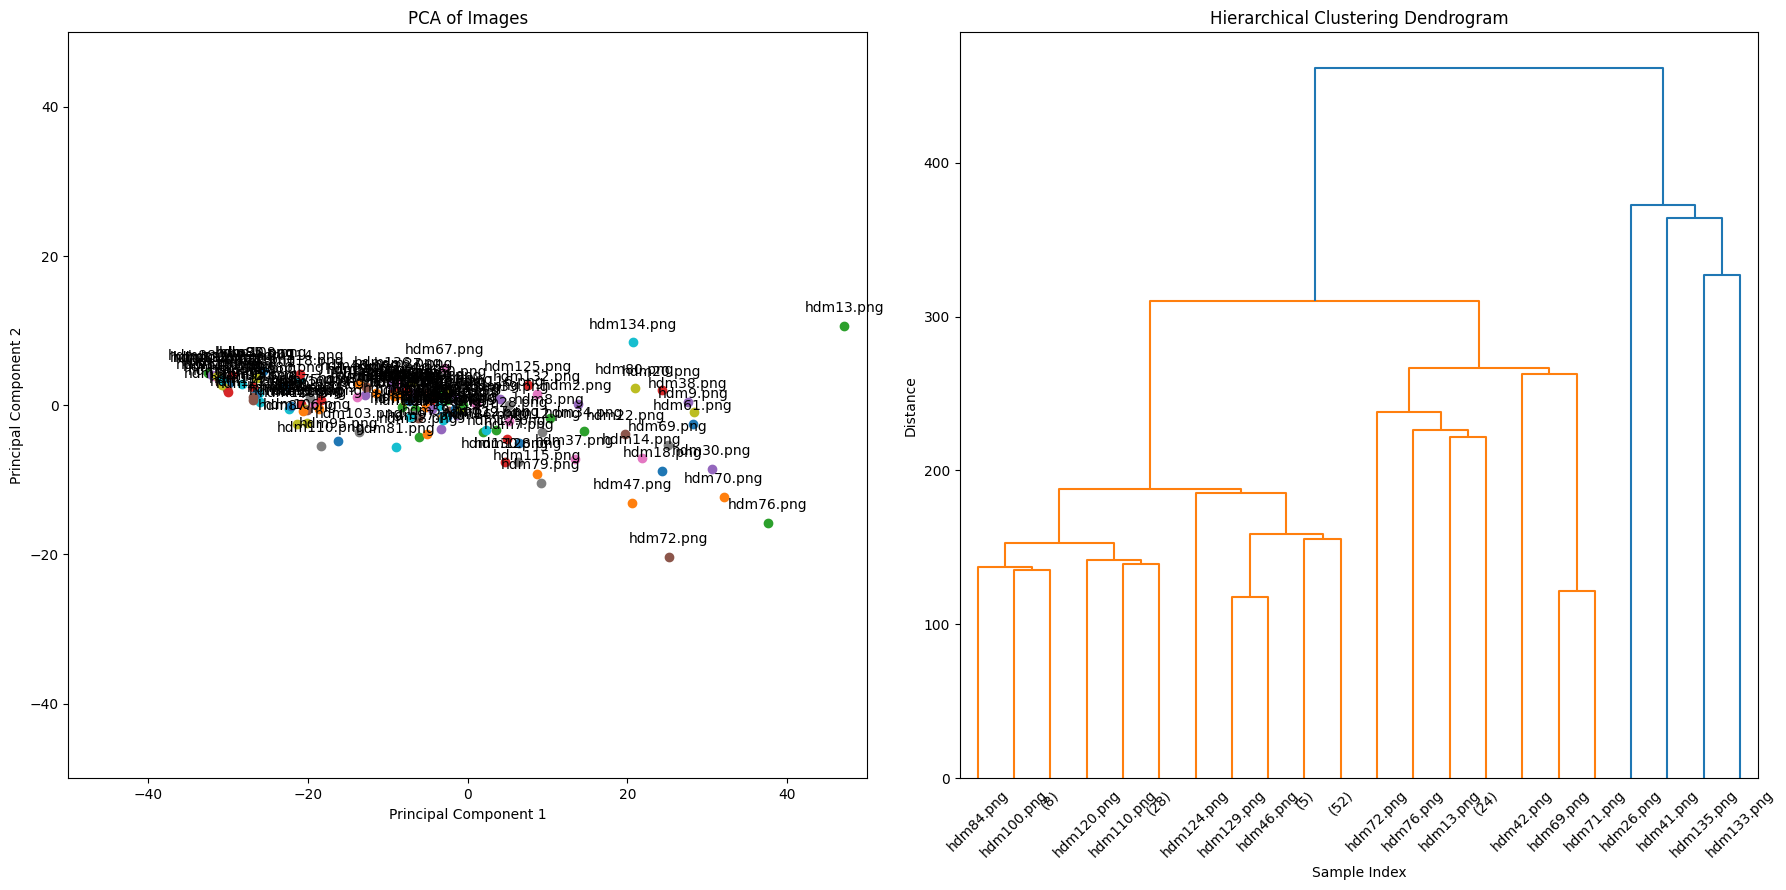

In [ ]:
# Import necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import os

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    image_names = []
    for filename in os.listdir(folder):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img = Image.open(os.path.join(folder, filename)).convert('L')
            if img is not None:
                images.append(img)
                image_names.append(filename)
    return images, image_names

# Function to preprocess images (resize and flatten)
def preprocess_images(images, size=(100, 100)):
    resized_images = [img.resize(size) for img in images]
    flattened_images = [np.array(img).flatten() for img in resized_images]
    return np.array(flattened_images)

# Function to perform PCA
def perform_pca(image_data):
    scaler = StandardScaler()
    image_data_std = scaler.fit_transform(image_data)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(image_data_std)
    return principal_components

# Function to perform hierarchical clustering
def perform_clustering(image_data_std):
    return linkage(image_data_std, method='ward')

# Function to visualize PCA results and dendrogram
def visualize_results(principal_components, linked, image_labels):
    plt.figure(figsize=(18, 9))

    # PCA scatter plot with image labels
    plt.subplot(1, 2, 1)
    for i, txt in enumerate(image_labels):
        plt.scatter(principal_components[i, 0], principal_components[i, 1])
        plt.annotate(txt, (principal_components[i, 0], principal_components[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('PCA of Images')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.xlim(-50, 50)
    plt.ylim(-50, 50)

    # Dendrogram with labels
    plt.subplot(1, 2, 2)
    dendrogram(linked, labels=image_labels, truncate_mode='level', p=5)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

    plt.tight_layout()
    plt.show()

# Specify the folder containing images
image_folder = '/content/drive/MyDrive/hdm'  # Update this path as per your folder structure

# Load and preprocess images
images, image_labels = load_images_from_folder(image_folder)
image_data = preprocess_images(images)

# Perform PCA
principal_components = perform_pca(image_data)

# Standardize the feature vectors for clustering
scaler = StandardScaler()
image_data_std = scaler.fit_transform(image_data)

# Perform hierarchical clustering
linked = perform_clustering(image_data_std)

# Visualize PCA results and dendrogram
visualize_results(principal_components, linked, image_labels)

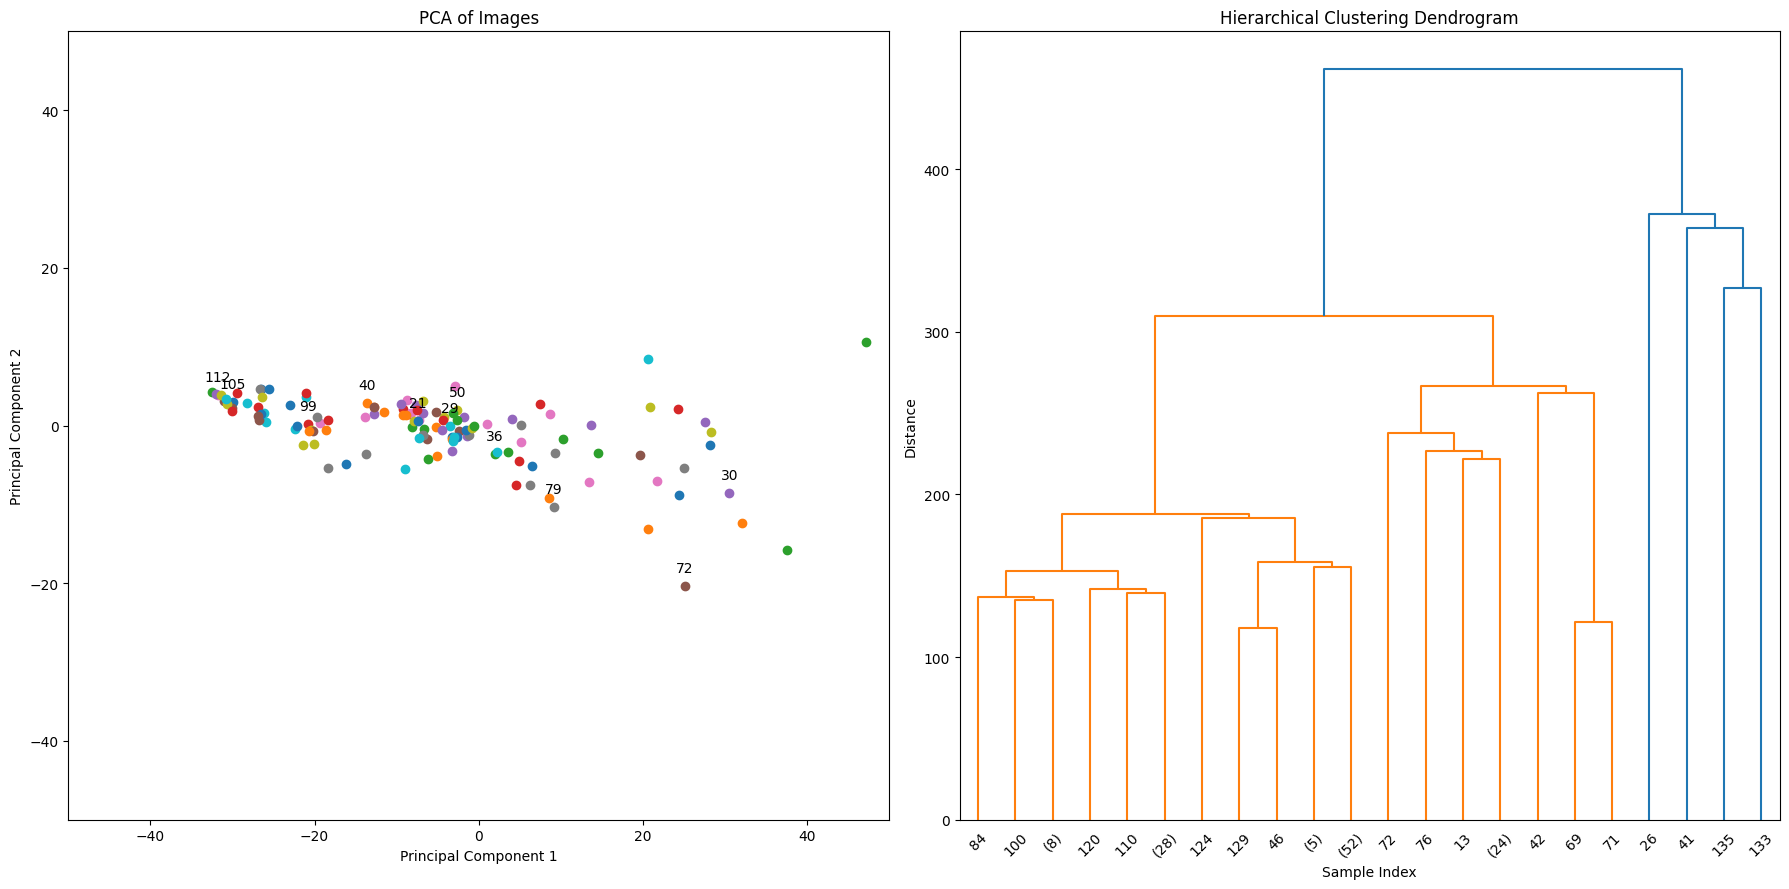

In [ ]:
# Import necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import os

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    image_names = []
    for filename in os.listdir(folder):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img = Image.open(os.path.join(folder, filename)).convert('L')
            if img is not None:
                images.append(img)
                # Extract number from filename
                number = ''.join(filter(str.isdigit, filename))
                image_names.append(number if number else filename)
    return images, image_names

# Function to preprocess images (resize and flatten)
def preprocess_images(images, size=(100, 100)):
    resized_images = [img.resize(size) for img in images]
    flattened_images = [np.array(img).flatten() for img in resized_images]
    return np.array(flattened_images)

# Function to perform PCA
def perform_pca(image_data):
    scaler = StandardScaler()
    image_data_std = scaler.fit_transform(image_data)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(image_data_std)
    return principal_components

# Function to perform hierarchical clustering
def perform_clustering(image_data_std):
    return linkage(image_data_std, method='ward')

# Function to visualize PCA results and dendrogram
def visualize_results(principal_components, linked, image_labels):
    plt.figure(figsize=(18, 9))

    # PCA scatter plot with image labels
    plt.subplot(1, 2, 1)
    num_labels = len(image_labels)
    for i, txt in enumerate(image_labels):
        plt.scatter(principal_components[i, 0], principal_components[i, 1])
        # Annotate only 10% of the images for clarity
        if i % (num_labels // 10) == 0:
            plt.annotate(txt, (principal_components[i, 0], principal_components[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('PCA of Images')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.xlim(-50, 50)
    plt.ylim(-50, 50)

    # Dendrogram with labels
    plt.subplot(1, 2, 2)
    dendrogram(linked, labels=image_labels, truncate_mode='level', p=5)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

    plt.tight_layout()
    plt.show()

# Specify the folder containing images
image_folder = '/content/drive/MyDrive/hdm'  # Update this path as per your folder structure

# Load and preprocess images
images, image_labels = load_images_from_folder(image_folder)
image_data = preprocess_images(images)

# Perform PCA
principal_components = perform_pca(image_data)

# Standardize the feature vectors for clustering
scaler = StandardScaler()
image_data_std = scaler.fit_transform(image_data)

# Perform hierarchical clustering
linked = perform_clustering(image_data_std)

# Visualize PCA results and dendrogram
visualize_results(principal_components, linked, image_labels)

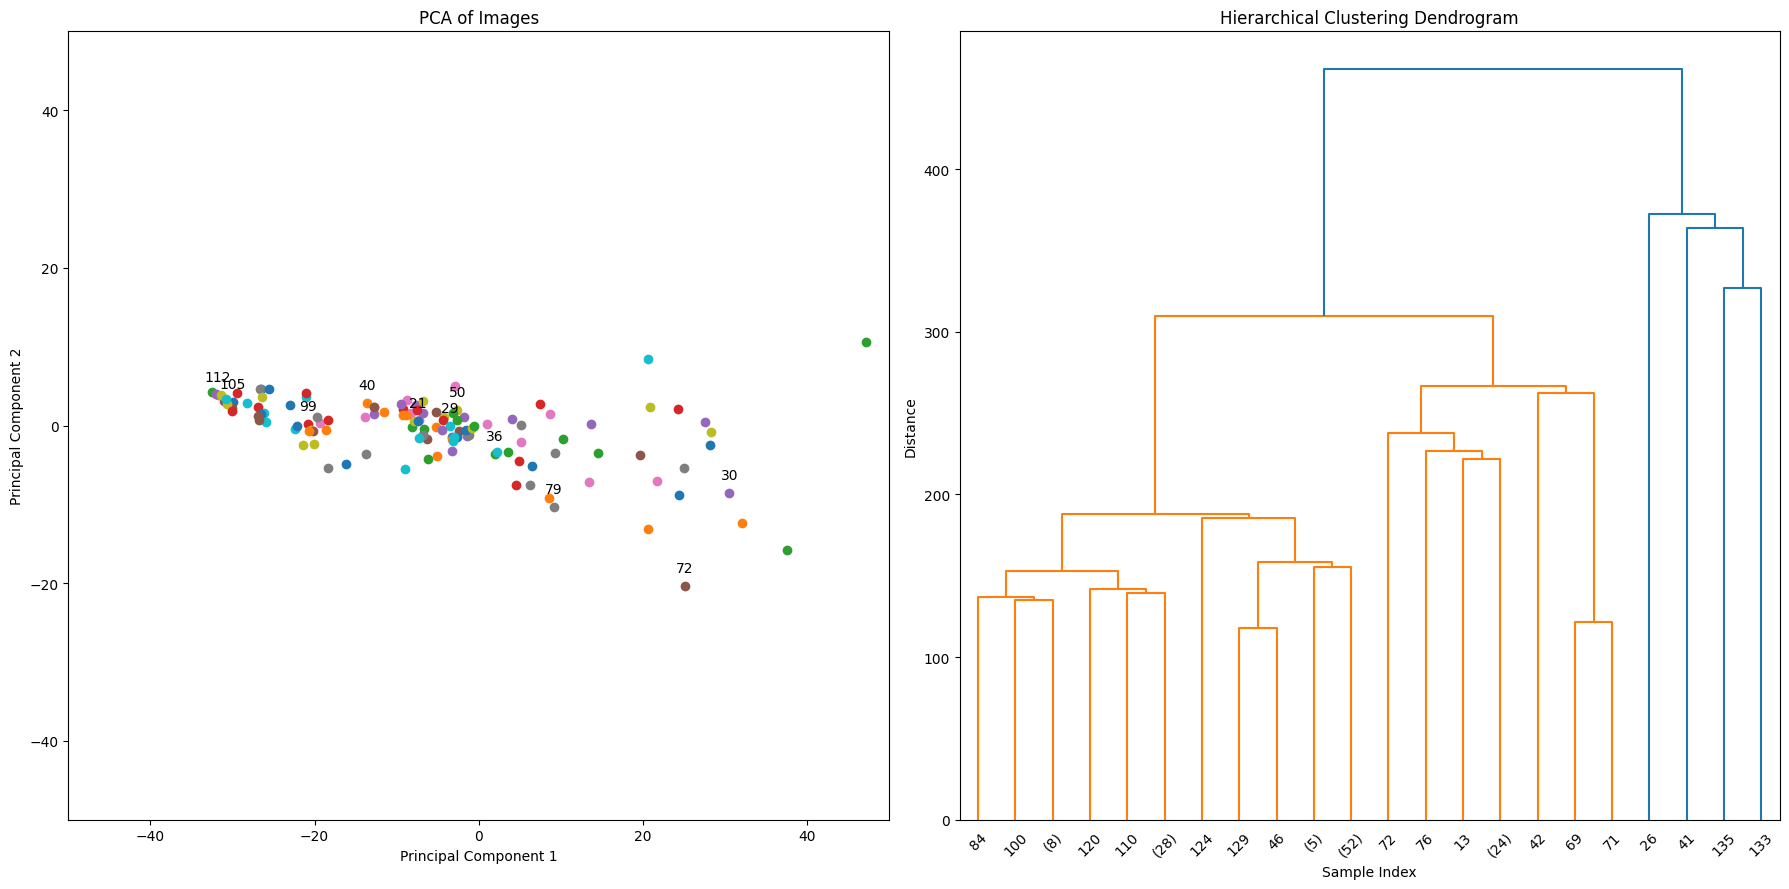

In [ ]:
# Import necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import os

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    image_names = []
    for filename in os.listdir(folder):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img = Image.open(os.path.join(folder, filename)).convert('L')
            if img is not None:
                images.append(img)
                # Extract number from filename
                number = ''.join(filter(str.isdigit, filename))
                image_names.append(number if number else filename)
    return images, image_names

# Function to preprocess images (resize and flatten)
def preprocess_images(images, size=(100, 100)):
    resized_images = [img.resize(size) for img in images]
    flattened_images = [np.array(img).flatten() for img in resized_images]
    return np.array(flattened_images)

# Function to perform PCA
def perform_pca(image_data):
    scaler = StandardScaler()
    image_data_std = scaler.fit_transform(image_data)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(image_data_std)
    return principal_components

# Function to perform hierarchical clustering
def perform_clustering(image_data_std):
    return linkage(image_data_std, method='ward')

# Function to visualize PCA results and dendrogram
def visualize_results(principal_components, linked, image_labels):
    plt.figure(figsize=(18, 9))

    # PCA scatter plot with image labels
    plt.subplot(1, 2, 1)
    num_labels = len(image_labels)
    for i, txt in enumerate(image_labels):
        plt.scatter(principal_components[i, 0], principal_components[i, 1])
        # Annotate only 10% of the images for clarity
        if i % (num_labels // 10) == 0:
            plt.annotate(txt, (principal_components[i, 0], principal_components[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('PCA of Images')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.xlim(-50, 50)
    plt.ylim(-50, 50)

    # Dendrogram with labels
    plt.subplot(1, 2, 2)
    dendrogram(linked, labels=image_labels, truncate_mode='level', p=5)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

    plt.tight_layout()
    plt.savefig('pca_bhc_visualization.png')  # Save the figure
    plt.show()

# Specify the folder containing images
image_folder = '/content/drive/MyDrive/hdm'  # Update this path as per your folder structure

# Load and preprocess images
images, image_labels = load_images_from_folder(image_folder)
image_data = preprocess_images(images)

# Perform PCA
principal_components = perform_pca(image_data)

# Standardize the feature vectors for clustering
scaler = StandardScaler()
image_data_std = scaler.fit_transform(image_data)

# Perform hierarchical clustering
linked = perform_clustering(image_data_std)

# Visualize PCA results and dendrogram
visualize_results(principal_components, linked, image_labels)

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Read the dataset
data_path = '/content/drive/MyDrive/names/cleaned_names.xlsx'
data = pd.read_excel(data_path)

# Display the first few rows of the dataset
print(data.head())

# Step 2: Read the shapefile
shapefile_path = '/content/drive/MyDrive/eatrh/ne_10m_admin_0_countries_grc.shp'
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame
print(gdf.head())

# Step 3: Merge the dataset with the geographical data
# Assuming the dataset has a common column with the shapefile for merging (e.g., 'region_id')
# Replace 'region_id' and 'value_column' with actual column names from your dataset
common_column = 'English_Names'  # Update with actual common column name
value_column = 'value_column'  # Update with actual value column name

merged_gdf = gdf.merge(data, how='left', left_on='admin', right_on=common_column)  # Update 'admin' if needed

# Step 4: Create Choropleth maps
# Assuming the dataset has a column 'value_column' that we want to visualize
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column=value_column, ax=ax, legend=True, legend_kwds={'label': "Value by Region",
                                                                      'orientation': "horizontal"})

# Step 5: Save the visualization as PNG
plt.title('Corfu Map')
plt.savefig('corfu_map.png')
plt.show()

                                  English_Names Greek_Names
0                                           NaN         NaN
1  English                                              NaN
2  Diapontian Islands                                   NaN
3  Mathraki                                             NaN
4  Ereikousa                                            NaN
  ADM0_A3_GR       featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  \
0        IDN  Admin-0 country          0          2  Indonesia    IDN   
1        MYS  Admin-0 country          0          3   Malaysia    MYS   
2        CHL  Admin-0 country          0          2      Chile    CHL   
3        BOL  Admin-0 country          0          3    Bolivia    BOL   
4        PER  Admin-0 country          0          2       Peru    PER   

   ADM0_DIF  LEVEL               TYPE TLC  ... FCLASS_TR FCLASS_ID  FCLASS_PL  \
0         0      2  Sovereign country   1  ...      None      None       None   
1         0      2  Sovereign country  

KeyError: 'admin'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Read the dataset
data_path = '/content/drive/MyDrive/names/cleaned_names.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(data.head())

# Step 2: Count the occurrences of each geographical name
data_counts = data['A'].value_counts().reset_index()
data_counts.columns = ['region_name', 'count']

# Display the first few rows of the counts dataframe
print(data_counts.head())

# Step 3: Read the shapefile
shapefile_path = '/content/drive/MyDrive/eatrh/ne_10m_admin_0_countries_grc.shp'
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame
print(gdf.head())

# Step 4: Merge the dataset with the geographical data
# Assuming 'region_name' corresponds to a column in the shapefile's GeoDataFrame (e.g., 'admin' for country names)
merged_gdf = gdf.merge(data_counts, how='left', left_on='admin', right_on='region_name')

# Step 5: Create Choropleth maps
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count', ax=ax, legend=True, legend_kwds={'label': "Count by Region",
                                                                 'orientation': "horizontal"})

# Step 6: Save the visualization as PNG
plt.title('Choropleth Map of Geographical Name Frequencies')
plt.savefig('choropleth_map.png')
plt.show()

ParserError: Error tokenizing data. C error: Expected 2 fields in line 14, saw 3


In [ ]:
import pandas as pd

# Step 1: Read the dataset
data_path = '/content/drive/MyDrive/names/cleaned_names_1.xlsx'  # Update this path if necessary
data = pd.read_excel(data_path)

# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Step 2: Count the occurrences of each geographical name
data_counts = data['Names'].value_counts().reset_index()
data_counts.columns = ['Names', 'Count']

# Display the first few rows of the counts dataframe
print("Processed Data (Counts):")
print(data_counts.head())

# Step 3: Save the modified dataframe to a new CSV file
output_csv_path = '/content/cleaned_names_with_counts.csv'
data_counts.to_csv(output_csv_path, index=False)

# Verify the file is saved correctly
print(f"Processed file saved to {output_csv_path}")

# Provide a download link for the CSV file in Colab
from google.colab import files
files.download(output_csv_path)

Original Data:
                    Names Count
0                Acharavi     7
1       Achilleion Palace     6
2                 Afionas     9
3  Afonias / Porto Timoni     1
4          Ageo lokastro      2
Processed Data (Counts):
            Names  Count
0          Sidari     26
1           Corfu     14
2           Ipsos     12
3  Paleokastritsa     12
4        Old Town     11
Processed file saved to /content/cleaned_names_with_counts.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Original Data:
            Names  Count
0          Sidari     26
1           Corfu     14
2           Ipsos     12
3  Paleokastritsa     12
4        Old Town     11
  ADM0_A3_GR       featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  \
0        IDN  Admin-0 country          0          2  Indonesia    IDN   
1        MYS  Admin-0 country          0          3   Malaysia    MYS   
2        CHL  Admin-0 country          0          2      Chile    CHL   
3        BOL  Admin-0 country          0          3    Bolivia    BOL   
4        PER  Admin-0 country          0          2       Peru    PER   

   ADM0_DIF  LEVEL               TYPE TLC  ... FCLASS_TR FCLASS_ID  FCLASS_PL  \
0         0      2  Sovereign country   1  ...      None      None       None   
1         0      2  Sovereign country   1  ...      None      None       None   
2         0      2  Sovereign country   1  ...      None      None       None   
3         0      2  Sovereign country   1  ...      None      None      

KeyError: 'admin'

In [ ]:
# Ensure the necessary imports are available
import pandas as pd

# Load the data from the provided CSV file
file_path = '/content/cleaned_names_with_counts.csv'
data_with_coordinates = pd.read_csv(file_path)

# Placeholder coordinates for Corfu
placeholder_latitude = 39.6243
placeholder_longitude = 19.9217

# Add placeholder coordinates to all rows
data_with_coordinates['Latitude'] = placeholder_latitude
data_with_coordinates['Longitude'] = placeholder_longitude

# Save the updated data with coordinates to a new CSV file
output_file_path = '/content/cleaned_names_with_counts_done.csv'
data_with_coordinates.to_csv(output_file_path, index=False)

output_file_path

'/content/cleaned_names_with_counts_done.csv'

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Read the dataset
data_path = '/mnt/data/cleaned_names_with_counts.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Step 2: Read the shapefile
shapefile_path = '/content/drive/MyDrive/eatrh/ne_10m_admin_0_countries_grc.shp'
gdf = gpd.read_file(shapefile_path)

# Display the columns in the GeoDataFrame to find the correct one for merging
print("Columns in the GeoDataFrame:")
print(gdf.columns)

# Step 3: Merge the dataset with the geographical data
# Assuming 'Names' corresponds to the appropriate column in the shapefile's GeoDataFrame
# Let's print out the unique values in the relevant columns to understand the data better
print("Unique values in 'Names' column from the data:")
print(data['Names'].unique())

# Assuming the relevant column in the shapefile is 'NAME_EN' (you can choose the correct one based on the print output)
merged_gdf = gdf.merge(data, how='left', left_on='NAME_EN', right_on='Names')  # Update 'NAME_EN' with the actual column

# Step 4: Create Choropleth maps
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='Count', ax=ax, legend=True, legend_kwds={'label': "Count by Region",
                                                                 'orientation': "horizontal"},
                missing_kwds={'color': 'lightgrey', 'label': 'No Data'})

# Step 5: Save the visualization as PNG
plt.title('Choropleth Map of Corfu')
plt.savefig('/content/choropleth_map_corfu.png')
plt.show()

# Step 6: Provide a download link for the PNG file in Colab
from google.colab import files
files.download('/content/choropleth_map_corfu.png')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/cleaned_names_with_counts.csv'

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install YOLOv8 and dependencies
!pip install ultralytics opencv-python-headless

# Step 3: Set up directories and paths
import os
import shutil
import random

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/project-7-at-2024-05-28-10-58-9c947ad2'

# Create directories for train and val
os.makedirs(f'{drive_path}/images/train', exist_ok=True)
os.makedirs(f'{drive_path}/images/val', exist_ok=True)
os.makedirs(f'{drive_path}/labels/train', exist_ok=True)
os.makedirs(f'{drive_path}/labels/val', exist_ok=True)

# Function to split the dataset
def train_test_split(images_dir, labels_dir, split_ratio=0.8):
    images = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]
    random.shuffle(images)

    split_idx = int(len(images) * split_ratio)
    train_images = images[:split_idx]
    val_images = images[split_idx:]

    for img in train_images:
        try:
            shutil.move(os.path.join(images_dir, img), os.path.join(f'{images_dir}/train', img))
            label = img.replace('.png', '.txt').replace('.jpg', '.txt')  # Assuming labels have the same name as images but with .txt extension
            shutil.move(os.path.join(labels_dir, label), os.path.join(f'{labels_dir}/train', label))
        except FileNotFoundError:
            print(f"Label for {img} not found, skipping.")

    for img in val_images:
        try:
            shutil.move(os.path.join(images_dir, img), os.path.join(f'{images_dir}/val', img))
            label = img.replace('.png', '.txt').replace('.jpg', '.txt')
            shutil.move(os.path.join(labels_dir, label), os.path.join(f'{labels_dir}/val', label))
        except FileNotFoundError:
            print(f"Label for {img} not found, skipping.")

# Split the dataset
train_test_split(f'{drive_path}/images', f'{drive_path}/labels')

# Ensure the 'data' directory exists
os.makedirs('data', exist_ok=True)

# Create a YAML configuration file for your dataset
data_config = f"""
train: {drive_path}/images/train
val: {drive_path}/images/val

nc: 4  # Update with the correct number of classes
names: ['beaches', 'island', 'names_and_descriptions', 'signs']  # Update with your class names
"""

# Save the configuration to a file
with open('data/custom_dataset.yaml', 'w') as f:
    f.write(data_config)

# Step 4: Train the YOLOv8 Model
!yolo task=detect mode=train data=data/custom_dataset.yaml model=yolov8s.pt epochs=25 imgsz=640 batch=16

# Step 5: Evaluate the Model
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data/custom_dataset.yaml

# Step 6: Use the Trained Model for Inference
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/tryyolo8 imgsz=640 conf=0.25

ValueError: mount failed

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install YOLOv8 and dependencies
!pip install ultralytics opencv-python-headless

# Step 3: Set up directories and paths
import os
import shutil
import random

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/yololabels'

# Create directories for train and val
os.makedirs(f'{drive_path}/images/train', exist_ok=True)
os.makedirs(f'{drive_path}/images/val', exist_ok=True)
os.makedirs(f'{drive_path}/labels/train', exist_ok=True)
os.makedirs(f'{drive_path}/labels/val', exist_ok=True)

# Function to split the dataset
def train_test_split(images_dir, labels_dir, split_ratio=0.8):
    images = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]
    random.shuffle(images)

    split_idx = int(len(images) * split_ratio)
    train_images = images[:split_idx]
    val_images = images[split_idx:]

    for img in train_images:
        try:
            shutil.move(os.path.join(images_dir, img), os.path.join(f'{images_dir}/train', img))
            label = img.replace('.png', '.txt').replace('.jpg', '.txt')  # Assuming labels have the same name as images but with .txt extension
            shutil.move(os.path.join(labels_dir, label), os.path.join(f'{labels_dir}/train', label))
        except FileNotFoundError:
            print(f"Label for {img} not found, skipping.")

    for img in val_images:
        try:
            shutil.move(os.path.join(images_dir, img), os.path.join(f'{images_dir}/val', img))
            label = img.replace('.png', '.txt').replace('.jpg', '.txt')
            shutil.move(os.path.join(labels_dir, label), os.path.join(f'{labels_dir}/val', label))
        except FileNotFoundError:
            print(f"Label for {img} not found, skipping.")

# Split the dataset
train_test_split(f'{drive_path}/images', f'{drive_path}/labels')

# Ensure the 'data' directory exists
os.makedirs('data', exist_ok=True)

# Create a YAML configuration file for your dataset
data_config = f"""
train: {drive_path}/images/train
val: {drive_path}/images/val

nc: 4  # Update with the correct number of classes
names: ['beaches', 'island', 'names_and_descriptions', 'signs']  # Update with your class names
"""

# Save the configuration to a file
with open('data/custom_dataset.yaml', 'w') as f:
    f.write(data_config)

# Step 4: Train the YOLOv8 Model
!yolo task=detect mode=train data=data/custom_dataset.yaml model=yolov8s.pt epochs=50 imgsz=640 batch=16

# Step 5: Evaluate the Model
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data/custom_dataset.yaml

# Step 6: Use the Trained Model for Inference
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/tryyolo8 imgsz=640 conf=0.25

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.4/779.4 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvt

In [ ]:
# Step 6: Use the Trained Model for Inference
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/tryyolo8 imgsz=640 conf=0.25

/bin/bash: line 1: yolo: command not found


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install YOLOv8 and dependencies
!pip install ultralytics opencv-python-headless

# Step 3: Set up directories and paths
import os
import shutil
import random

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/project-7-at-2024-05-28-10-58-9c947ad2'

# Create directories for train and val
os.makedirs(f'{drive_path}/images/train', exist_ok=True)
os.makedirs(f'{drive_path}/images/val', exist_ok=True)
os.makedirs(f'{drive_path}/labels/train', exist_ok=True)
os.makedirs(f'{drive_path}/labels/val', exist_ok=True)

# Function to split the dataset
def train_test_split(images_dir, labels_dir, split_ratio=0.8):
    images = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]
    random.shuffle(images)

    split_idx = int(len(images) * split_ratio)
    train_images = images[:split_idx]
    val_images = images[split_idx:]

    for img in train_images:
        try:
            shutil.move(os.path.join(images_dir, img), os.path.join(f'{images_dir}/train', img))
            label = img.replace('.png', '.txt').replace('.jpg', '.txt')  # Assuming labels have the same name as images but with .txt extension
            shutil.move(os.path.join(labels_dir, label), os.path.join(f'{labels_dir}/train', label))
        except FileNotFoundError:
            print(f"Label for {img} not found, skipping.")

    for img in val_images:
        try:
            shutil.move(os.path.join(images_dir, img), os.path.join(f'{images_dir}/val', img))
            label = img.replace('.png', '.txt').replace('.jpg', '.txt')
            shutil.move(os.path.join(labels_dir, label), os.path.join(f'{labels_dir}/val', label))
        except FileNotFoundError:
            print(f"Label for {img} not found, skipping.")

# Split the dataset
train_test_split(f'{drive_path}/images', f'{drive_path}/labels')

# Ensure the 'data' directory exists
os.makedirs('data', exist_ok=True)

# Create a YAML configuration file for your dataset
data_config = f"""
train: {drive_path}/images/train
val: {drive_path}/images/val

nc: 4  # Update with the correct number of classes
names: ['beaches', 'island', 'names_and_descriptions', 'signs']  # Update with your class names
"""

# Save the configuration to a file
with open('data/custom_dataset.yaml', 'w') as f:
    f.write(data_config)

# Step 4: Train the YOLOv8 Model
!yolo task=detect mode=train data=data/custom_dataset.yaml model=yolov8s.pt epochs=100 imgsz=640 batch=16

# Step 5: Evaluate the Model
!yolo task=detect mode=val model=runs/detect/train7/weights/best.pt data=data/custom_dataset.yaml

# Step 6: Use the Trained Model for Inference
!yolo task=detect mode=predict model=runs/detect/train7/weights/best.pt source=/content/drive/MyDrive/tryyolo8 imgsz=640 conf=0.25

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvt

In [ ]:
# Step 5: Evaluate the Model
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data/custom_dataset.yaml

# Step 6: Use the Trained Model for Inference
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/project-7-at-2024-05-28-10-58-9c947ad2 imgsz=640 conf=0.25

Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/project-7-at-2024-05-28-10-58-9c947ad2/labels/val.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:05<00:00,  5.09s/it]
                   all          8        190      0.721      0.518      0.574       0.29
               beaches          1          2          1          0      0.221     0.0884
                island          7          7      0.537          1       0.96      0.659
names_and_descriptions          8        129      0.621      0.667      0.638       0.26
                 signs          5         52      0.724      0.405      0.477      0.155
Speed: 9.8ms preprocess, 575.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/de